In [1]:
import tensorflow as tf
import numpy as np
import sklearn as sk
from sklearn.datasets import make_classification
import scikitplot as skplt
import pandas as pd
import cv2

import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt             
import random
from tqdm.notebook import tqdm



# PART I: Pre processing subsys 1 and 2 Dataset.

Shape imported data		:(62219, 84)
Expecting 80 landmarks		:80
Expecting 2 columns classes	:2
side
side
The following figure is		:['open' 'dorsal']


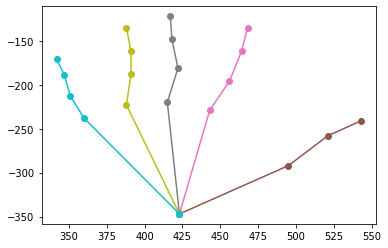

In [2]:
#############################
# PART I: Preparing Dataset.#
# @Elvis                    #
#############################
# The following code assumes that: 
# 1: .CSV files contains all hand gestures.
# 2: frame column exits. (This will be handled here).
# 3: 20 landmarks for each side of hand. (40 in total).

# Macros
LANDMARKS_NUM            = 80
LANDMARKS_OFFSET         = 4
CLASS_OFFSET             = 2
PATH_DATASET_1           = 'subsystem_1/Dataset_Subsystem_1.xlsx'
PATH_DATASET_2           = 'subsystem_2/Dataset_subsystem_2.csv'

# Pre processing params
shuffle    = True         # Shuffle data before using.
dropout    = False        # Dropout regularization.
gradcheck  = False        # Gradient checking. 
moredata   = False        # Extend dataset adding modifications of data.
test_size  = 0.10         # Train, dev, test percentage. 


# LOADING DATASET 1
##################################
dset_1 = pd.read_excel(PATH_DATASET_1)        # Dataset 1 (Excel file)


# LOADING DATASET 2
##################################
dset_2 = pd.read_csv(PATH_DATASET_2, sep=",") # Dataset 2 (csv file)

Xfeatures = dset_2.columns[LANDMARKS_OFFSET:]
Yfeatures = dset_2.columns[CLASS_OFFSET:CLASS_OFFSET + 2]

X = dset_2[Xfeatures].to_numpy(dtype=np.float32)  # Extracting samples. 
Y = dset_2[Yfeatures]                             # Extracing classes.

print(f'Shape imported data\t\t:{dset_2.shape}')
print(f'Expecting {LANDMARKS_NUM} landmarks\t\t:{Xfeatures.shape[0]}')
print(f'Expecting 2 columns classes\t:{Yfeatures.shape[0]}')

# Encoding as [open, first, three_fingers, dorsal, palm]
onehot_encoder = OneHotEncoder(categories='auto')
onehot_encoded = onehot_encoder.fit_transform(Y).toarray()

# Display random hand gestures.
random_indx = random.choice(range(X.shape[0]))
random_hand = X[random_indx].reshape((2,20,2))

for side in random_hand:
    print("side")
    root   = side[0]
    thumb  = np.vstack((root, side[1:4]))
    index  = np.vstack((root, side[4:8]))
    middle = np.vstack((root, side[8:12]))
    ring   = np.vstack((root, side[12:16]))
    pinky  = np.vstack((root, side[16:]))

    thumb  = thumb[~np.all(thumb == 0, axis=1)]
    index  = index[~np.all(index == 0, axis=1)]
    middle = middle[~np.all(middle == 0, axis=1)]
    ring   = ring[~np.all(ring == 0, axis=1)]
    pinky  = pinky[~np.all(pinky == 0, axis=1)]

    for finger in [thumb, index, middle, ring, pinky]:
            plt.plot(finger[:,0], -finger[:,1], marker='o')

print(f'The following figure is\t\t:{Y.to_numpy()[random_indx]}')
plt.show()


# Split data into train and test sets. Shuffe data if param enabled.
X_train, X_test, Y_train, Y_test = train_test_split(X, onehot_encoded, test_size = test_size, shuffle=shuffle)

In [5]:
##################################
# SUBSYSTEM I: Landmark Extraction
##################################

# X_ss1 = np.empty((dset_1.shape[0], 480*640*3), dtype='uint8')
# print(X_ss1.shape)

for source in tqdm(dset_1["source"].unique()):
    path = os.path.join("subsystem_1", "videos", *source.split('/'))
    print(f"Reading file: {path}")
    
    cap = cv2.VideoCapture(path)

    i=0
    ret, frame = cap.read()
    while tqdm(ret and cap.isOpened()):
        print(frame.shape)

        # np.append(X_ss1, frame.reshape(1,480*640*3))
        i+=1

    cap.release()

# X_ss1.shape

MemoryError: Unable to allocate 10.3 GiB for an array with shape (11996, 921600) and data type uint8

In [ ]:
##################################
# SUBSYSTEM II: Gesture recognition
##################################

# Random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train,Y_train)
predicted = onehot_encoder.inverse_transform(clf.predict(X_test))
actual    = onehot_encoder.inverse_transform(Y_test)

In [ ]:
##################################
# SUBSYSTEM III: Sys I and II 
##################################

